In [1]:
import numpy as np 
import pandas as pd 
from copy import deepcopy
from matplotlib import pyplot as plt

In [3]:
k = 3
X = np.random.random((200, 2))*10
C_x = np.random.randint(0, np.max(X), size=k)
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[0. 4.]
 [2. 4.]
 [2. 8.]]


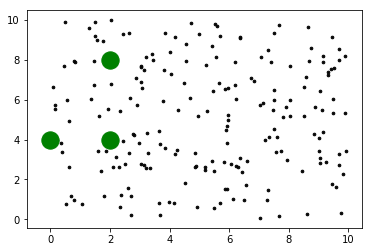

In [4]:
plt.scatter(X[:,0], X[:,1], c='#050505', s=7)
plt.scatter(C[:,0], C[:,1], s=300, c='g')

In [5]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))

In [6]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [7]:
# 两次迭代中心点距离
error = dist(C, C_old, None)

In [8]:
while error != 0:
    # 分配各点
    for i in range(len(X)):
        distances = dist(X[i],C)
        cluster = np.argmin(distances) #最小值对应index
        clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis = 0)
    error = dist(C, C_old, None)

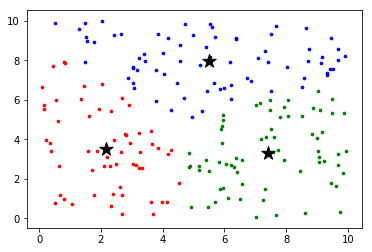

In [11]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')